#1.Give a count of all videos currently out.
#1)find rental whose return time is null
# select count(1) from rental
   # where return_date is NULL


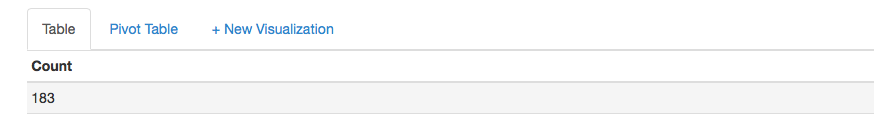

In [2]:
from IPython.display import Image
Image(filename='1.png')


The number of videos currently out is 183

    
#3.Give the most popular actors by store location.
# SELECT ad.address,COUNT(fa.actor_id), first_name, last_name
# FROM rental r
# JOIN inventory iv on iv.inventory_id = r.inventory_id
# JOIN store s on s.store_id = iv.store_id
# JOIN address ad on ad.address_id = s.address_id
# JOIN film_actor fa on fa.film_id = iv.film_id
# JOIN actor a on a.actor_id = fa.actor_id
# GROUP BY ad.address,first_name,last_name
# ORDER BY COUNT DESC    
    

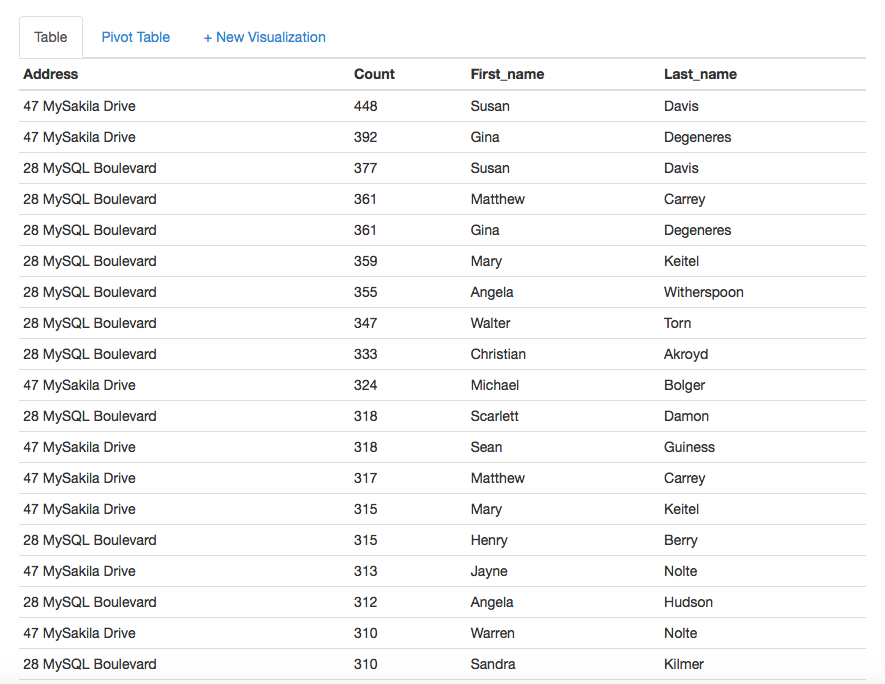

In [3]:
Image(filename='2.png')

From the table we could tell in both stores, the most popular actor is Susan Davis.

#5.What hour of the day to people rent the most?
#1)group by hour
#2)count
#3)order by count
# SELECT hour,
 #      count(*)
# FROM
 # (SELECT extract(hour
   #               FROM rental_date) AS hour
   # FROM rental) AS hour
# GROUP BY 1
# ORDER BY COUNT DESC

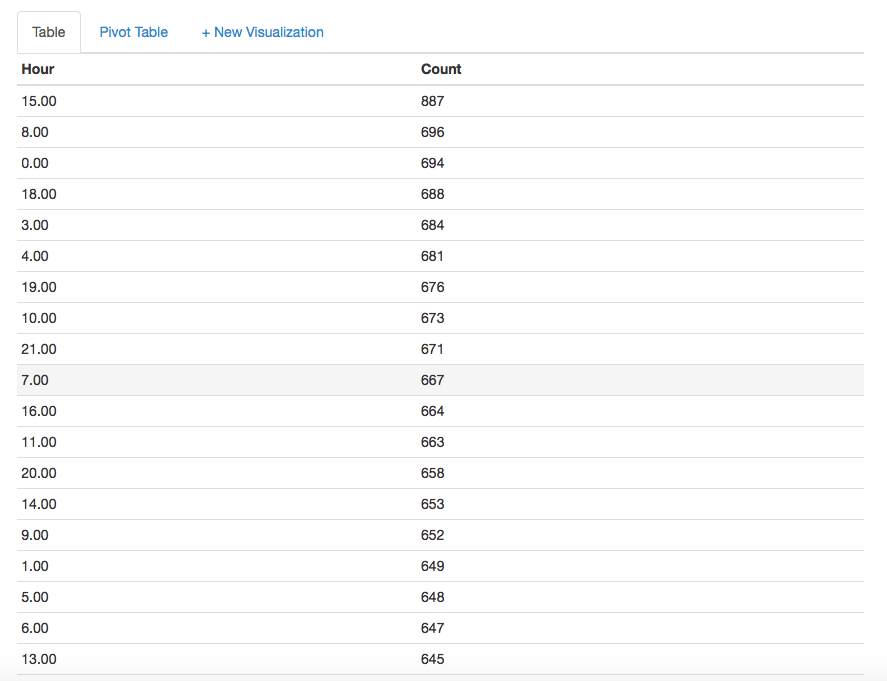

In [4]:
Image(filename='3.png')

From 15:00 to 16:00, people rent the most

#6.Which store is more profitable, assuming all movies cost $15 per inventory item to purchase.
#1)join the table inventory(inventory id) to store (manager) to sales
#2)count the inventory and calculate the profit
# SELECT s.store, (s.total_sales - 15*count(i.inventory_id)) AS profit
 #  FORM sales_by_store s
  #JOIN staff_list sl ON sl.name = s.manager
  #JOIN inventory i ON i.store_id = sl.sid
  #GROUP BY s.store, s.total_sales



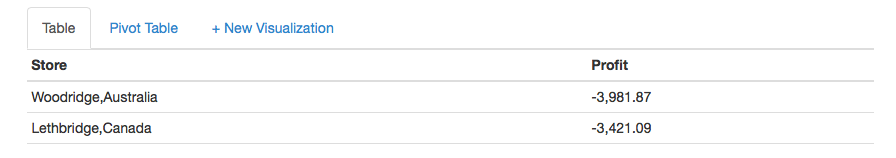

In [6]:
Image(filename='4.png')

The store in Lethbridge is more profitable